# libraires

## isnatling libraires

In [ ]:
!pip install roboflow opencv-python-headless matplotlib seaborn
!pip install ultralytics
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.0 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.8
    Uninstalling idna-3.8:
      Successfully uninstalled idna-3.8
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 872.2/872.2 kB 22.7 MB/s eta 0:00:00


## loading libraires

In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO
import requests
from roboflow import Roboflow
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import defaultdict
import cv2
from tqdm import tqdm_notebook, tnrange
from glob import glob
from itertools import chain
from skimage.io import imread, imshow, concatenate_images
from skimage.transform import resize

from sklearn.model_selection import train_test_split

import tensorflow as tf
from skimage.color import rgb2gray
from tensorflow.keras import Input
from tensorflow.keras.models import Model, load_model, save_model
from tensorflow.keras.layers import Input, Activation, BatchNormalization, Dropout, Lambda, Conv2D, Conv2DTranspose, MaxPooling2D, Concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# data

## data loading

In [ ]:
rf = Roboflow(api_key="qThsciAVU5casjv84UE5")
project1 = rf.workspace("final-eyj5r").project("brain-mri-pqpcm")
version1 = project1.version(1)
dataset1 = version1.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.84, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Brain-MRI-1 in yolov8:: 100%|██████████| 7050/7050 [00:03<00:00, 2192.62it/s]


## data visulzation

In [ ]:
# Initialize a list to store the average pixel intensity of each image
avg_pixel_intensities = []

# Define the path to the images
image_dir = os.path.join(dataset.location, "train", "images")  # Assuming you want to analyze the training images

# Iterate over the images in the directory
for image_name in os.listdir(image_dir):
    if image_name.endswith(('.jpg', '.jpeg', '.png')):  # Ensure you only process image files
        # Load the image
        image_path = os.path.join(image_dir, image_name)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load in grayscale for simplicity

        if image is not None:
            # Calculate the average pixel intensity
            avg_intensity = np.mean(image)
            avg_pixel_intensities.append(avg_intensity)

# Convert the list to a numpy array (optional)
avg_pixel_intensities = np.array(avg_pixel_intensities)

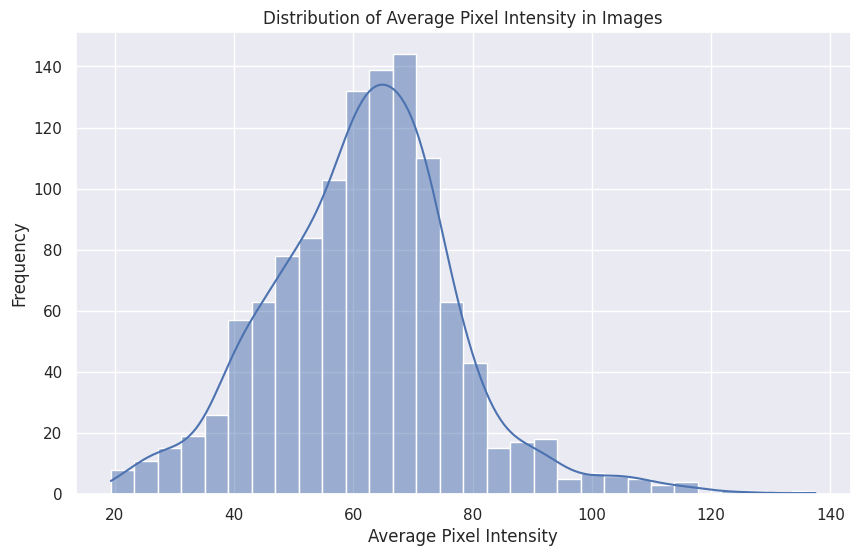

In [ ]:
# Set the plot style
sns.set(style="darkgrid")

# Create the histogram plot
plt.figure(figsize=(10, 6))
sns.histplot(avg_pixel_intensities, bins=30, kde=True)

# Add labels and title
plt.xlabel("Average Pixel Intensity")
plt.ylabel("Frequency")
plt.title("Distribution of Average Pixel Intensity in Images")

# Show the plot
plt.show()

In [ ]:
# Initialize a dictionary to count classes
class_counts = defaultdict(int)

# Define the path to the labels (annotations)
label_dir = os.path.join(dataset.location, "train", "labels")  # Assuming you want to analyze the training labels

# Iterate over the label files in the directory
for label_name in os.listdir(label_dir):
    if label_name.endswith('.txt'):  # Ensure you only process label files
        # Load the label file
        label_path = os.path.join(label_dir, label_name)
        with open(label_path, 'r') as file:
            # Each line in the file corresponds to an object
            for line in file:
                class_id = int(line.split()[0])  # Extract the class_id (first value on each line)
                class_counts[class_id] += 1
# Convert the class counts to a list of (class_id, count) tuples
class_counts_list = sorted(class_counts.items())

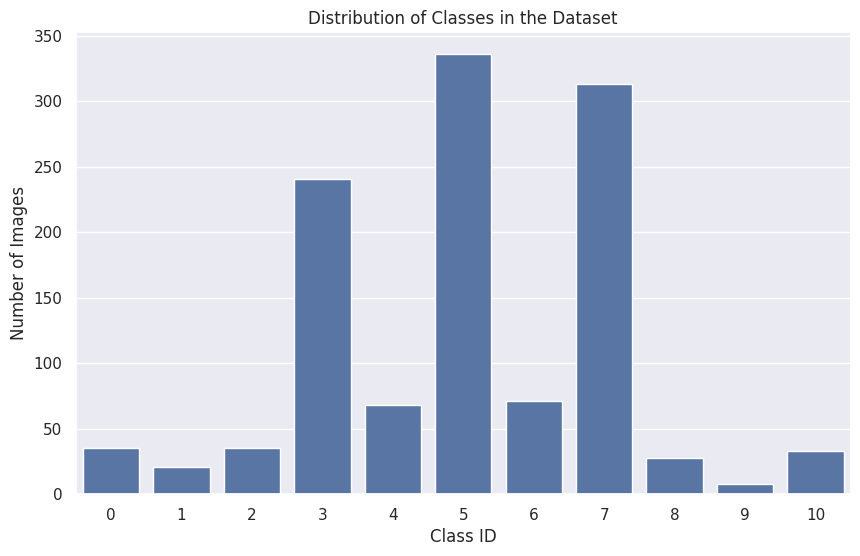

In [ ]:
# Prepare data for plotting
class_ids = [item[0] for item in class_counts_list]
counts = [item[1] for item in class_counts_list]

# Set the plot style
sns.set(style="darkgrid")

# Create the histogram plot
plt.figure(figsize=(10, 6))
sns.barplot(x=class_ids, y=counts)

# Add labels and title
plt.xlabel("Class ID")
plt.ylabel("Number of Images")
plt.title("Distribution of Classes in the Dataset")

# Show the plot
plt.show()

# model for classfiction

## load model

In [ ]:
model = YOLO("yolov8n.pt")

100%|██████████| 6.25M/6.25M [00:00<00:00, 80.0MB/s]


## train model

In [ ]:
results = model.train(data=os.path.join('/content/Brain-MRI-1/data.yaml'), epochs=10)

Ultralytics YOLOv8.2.84 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Brain-MRI-1/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, 

`torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
train: Scanning /content/Brain-MRI-1/train/labels... 2464 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2464/2464 [00:01<00:00, 1692.74it/s]

train: WARNING ⚠️ /content/Brain-MRI-1/train/images/Tr-me_0652_jpg.rf.68f8e11a4c552b365ca646becc30f3b7.jpg: 1 duplicate labels removed


train: New cache created: /content/Brain-MRI-1/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/Brain-MRI-1/valid/labels... 701 images, 0 backgrounds, 0 corrupt: 100%|██████████| 701/701 [00:01<00:00, 488.29it/s]


val: New cache created: /content/Brain-MRI-1/valid/labels.cache
Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      2.29G      1.064      3.242      1.177         19        640: 100%|██████████| 154/154 [00:53<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:10<00:00,  2.20it/s]

                   all        701        875      0.495      0.425      0.415       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      2.19G      1.094       2.19      1.206         20        640: 100%|██████████| 154/154 [00:48<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:08<00:00,  2.69it/s]


                   all        701        875      0.623      0.554       0.61      0.417

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      2.19G      1.113       1.76      1.218         24        640: 100%|██████████| 154/154 [00:47<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:08<00:00,  2.56it/s]

                   all        701        875      0.596      0.605      0.603      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      2.19G      1.061      1.468      1.194         19        640: 100%|██████████| 154/154 [00:46<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:09<00:00,  2.29it/s]

                   all        701        875      0.708      0.675      0.732      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      2.18G     0.9746       1.23      1.145         20        640: 100%|██████████| 154/154 [00:46<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:08<00:00,  2.71it/s]

                   all        701        875      0.725      0.694      0.739      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      2.18G     0.9378      1.125      1.129         19        640: 100%|██████████| 154/154 [00:47<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:08<00:00,  2.65it/s]

                   all        701        875      0.763      0.708      0.778      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      2.18G        0.9      1.011      1.105         21        640: 100%|██████████| 154/154 [00:48<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:08<00:00,  2.74it/s]

                   all        701        875      0.803      0.711      0.799      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      2.18G     0.8301     0.9092      1.073         16        640: 100%|██████████| 154/154 [00:47<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:08<00:00,  2.65it/s]

                   all        701        875      0.766      0.738        0.8      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      2.18G     0.7996     0.8475      1.057         18        640: 100%|██████████| 154/154 [00:47<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:08<00:00,  2.73it/s]

                   all        701        875      0.797      0.773      0.842      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      2.18G     0.7362     0.7736      1.017         20        640: 100%|██████████| 154/154 [00:48<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:07<00:00,  2.96it/s]

                   all        701        875      0.805       0.79      0.845       0.67



10 epochs completed in 0.161 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.2MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics YOLOv8.2.84 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:09<00:00,  2.24it/s]


                   all        701        875      0.789       0.81      0.845       0.67
                glioma        245        372      0.671      0.718      0.766      0.593
            meningioma        226        232      0.924       0.89      0.924       0.79
             pituitary        230        271      0.772      0.823      0.844      0.628
Speed: 0.3ms preprocess, 2.3ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to runs/detect/train2


## test

### check model classes

### test 1

loading image

(-0.5, 3078.5, 3030.5, -0.5)

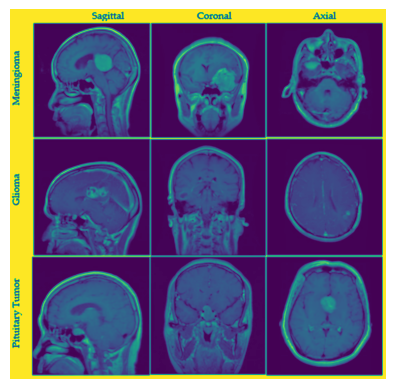

In [ ]:
img = 'https://www.mdpi.com/curroncol/curroncol-29-00590/article_deploy/html/images/curroncol-29-00590-g001.png'
response = requests.get(img)
img = Image.open(BytesIO(response.content))
plt.imshow(img)
plt.axis('off')

testing image


0: 640x640 2 gliomas, 3 meningiomas, 10.9ms
Speed: 5.1ms preprocess, 10.9ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)


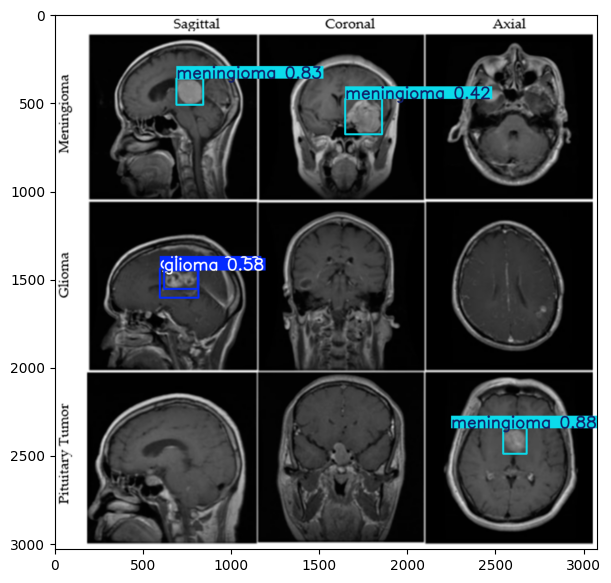

In [ ]:
results = model.predict(img)
for r in results:
  im_array=r.plot()
  plt.figure(figsize=(7,7))
  plt.imshow(im_array[...,::-1])
  plt.show()

### test 2

loading image

(-0.5, 719.5, 779.5, -0.5)

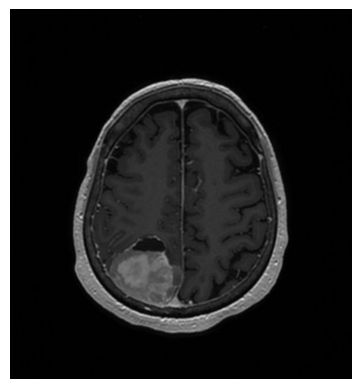

In [ ]:
img = 'https://www.ucsf.edu/sites/default/files/styles/two_col_banner_full/public/2023-11/meningioma-scan.jpg'
response = requests.get(img)
img = Image.open(BytesIO(response.content))
plt.imshow(img)
plt.axis('off')

testing image


0: 640x608 1 meningioma, 87.3ms
Speed: 4.7ms preprocess, 87.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 608)


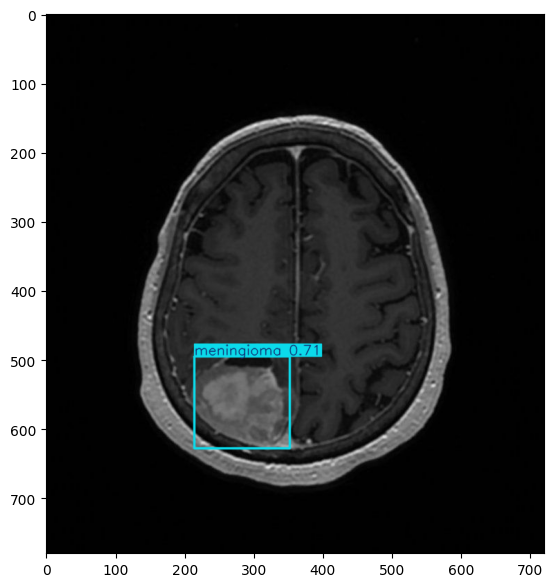

In [ ]:
results = model.predict(img)
for r in results:
  im_array=r.plot()
  plt.figure(figsize=(7,7))
  plt.imshow(im_array[...,::-1])
  plt.show()

### test3

loading image

(-0.5, 885.5, 406.5, -0.5)

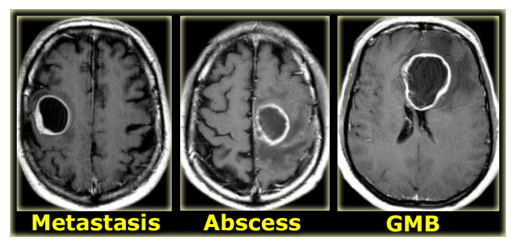

In [ ]:
img = 'https://radiologyassistant.nl/assets/brain-tumor-systematic-approach/a5097978421661_Enhancement-ring.png'
response = requests.get(img)
img = Image.open(BytesIO(response.content))
plt.imshow(img)
plt.axis('off')

testing image


0: 320x640 3 gliomas, 78.5ms
Speed: 5.4ms preprocess, 78.5ms inference, 1.8ms postprocess per image at shape (1, 3, 320, 640)


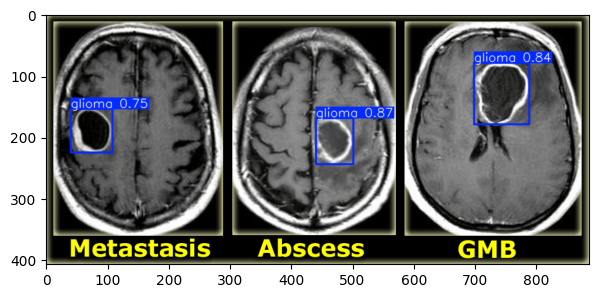

In [ ]:
results = model.predict(img)
for r in results:
  im_array=r.plot()
  plt.figure(figsize=(7,7))
  plt.imshow(im_array[...,::-1])
  plt.show()